### SVM
* support vector machine
* 분류나 회귀분석에 사용가능한 기법
    + 분류쪽 성능이 뛰어나서 주로 분류에 많이 사용
* 신경망에 비해 간결해서 뛰어난 성능을 보여준 탓에 신경망에 암흑기를 가져다 준 대표적인 머신러닝 알고리즘
* 이미지 인식이나 필체패턴 인식과 같은 작업에 주로 사용
* 마진을 최대로 하는 결정경계를 찾는 것이 SVM의 주된 알고리즘
* 결정경계는 서로 다른 분류값을 결정짓는 경계
    + line, plane(2D), hyperplane(3D)
* 마진은 결정경계와 서포트벡터간의 거리를 의미
* 서포트벡터는 결정경계를 만드는데 영향을 주는 최전방 데이터

### 선형을 분류가 가능한 예
* 점들이 두 집단으로 잘 분류된 예제

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

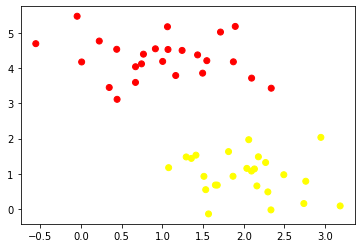

In [3]:
X,y = make_blobs(n_samples=50, centers=2, cluster_std=0.6, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')

In [4]:
# 빨간점과 노란점으로 구성된 집합을 적절히 구분하려고 할때 
# 3개의 직선중 어느것이 가장 최적으로 분류한 것일까?

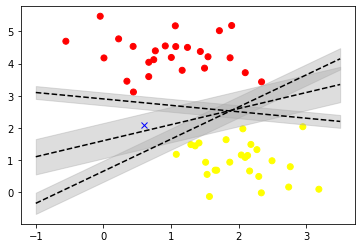

In [5]:
# 두 개의 데이터 집합을 잘 분리하는 직선을 그려봄
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.plot([0.6],[2.1], 'x', color='blue') # 테스트점

# 3개의 직선 긋기
xfit = np.linspace(-1, 3.5)

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit,yfit, 'k--')
    plt.fill_between(xfit,yfit-d,yfit+d, color='#AAAAAA', alpha=0.4)

In [6]:
# 가운데 직선은 다른 두직선에 비해 비교적 여유(마진)있게 두집합을 가르고 있음
# 이 덕택에 테스트 점 역시 여유있게 분류 가능
# 이렇게 최적으로 분류할 수 있는 직선을 통해 나눠지는 영역을 초평면이라 함

### SVM을 이용해서 초평면 구하기

In [7]:
from sklearn.svm import SVC

In [8]:
# kernel : 초평면 알고리즘 지정
svc = SVC(kernel='linear')
svc.fit(X,y)

SVC(kernel='linear')

In [9]:
# 초평면/서포트벡터 정보
svc.coef_[0][0], svc.coef_[0][1] # 회귀계수
svc.intercept_[0] # 절편
svc.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

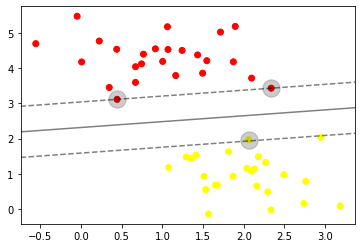

In [10]:
## 결정경게 시각화
import svm_visual

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], alpha=0.2, s=300, facecolor='k')

svm_visual.plot_svc_decision_function(svc)

### 비선형 분류
* 선형적으로 분류가 불가능한 경우에 대해서도 초평면을 구할 수 있을까?

In [11]:
from sklearn.datasets import make_circles

In [12]:
X,y = make_circles(n_samples=200, noise=0.04, random_state=0)

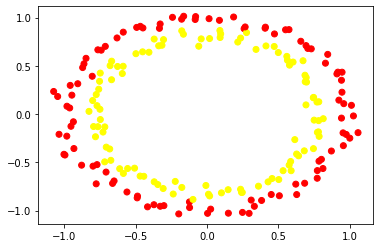

In [13]:
plt.scatter(X[:,0],X[:,1], c=y, cmap='autumn')

### 커널 트릭
* 구분이 불가능한 집합은 구분이 가능한 방향으로 맵핑시킨 새로운 공간에서는 구분이 가능할 것임
* 차원을 변환시키는 mapping함수를 통해 기존의 2차원 공간에 
* 새로운 차원을 추가해서 3차원으로 변환할 수 있다면 선형적으로 구분이 가능해짐
* 선형적으로 불가능한 차원을 선형적으로 구분이 가능한 고차원을 변환하는 것을 커널 트릭이라 하고 
* 이때 사용하는 함수를 커널 함수라 함
* 대표적인 커널함수는 카우시안 커널RBF이고 이것을 통해 무한대 차원으로 맵핑 가능

In [14]:
# 2차원 데이터를 3차원으로 변환후 시각화
from mpl_toolkits.mplot3d import Axes3D

In [15]:
X,y = make_circles(n_samples=200, noise=0.04, random_state=0)

In [16]:
# 커널함수 : 2차원을 3차원으로 변환
z = np.exp(-(X ** 2).sum(1))

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


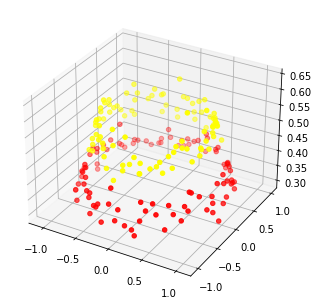

In [17]:
# 3차원으로 시각화 
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], z, c=y, cmap='autumn')

In [18]:
# SVM 시각화
import svm_visual

In [19]:
# SVC 초매개변수
# C(cost) : 규제 매개변수 (정확도 제한)
# gamma : 결정경계 곡률(마진) 조정 (값이 크면 결정경계면은 좁아짐)
svc = SVC(kernel='rbf', C=10.0, gamma=0.1, random_state=0)
svc.fit(X,y)
svc.score(X,y)

0.99

/home/hadoop/machinelearning/svm_visual.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolor='black')


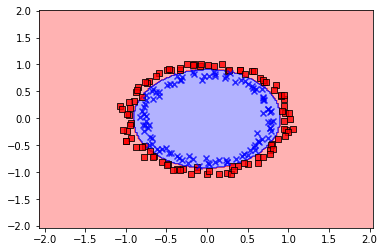

In [20]:
svm_visual.plot_decision_regions(X,y,svc)

### SVM 규제/감마 매개변수

In [21]:
# import mglearn

In [22]:
# pip install mglearn 
# -> error 로 실행 불가 

In [23]:
# fig,axes = plt.subplots(3,3, figsize=(15,10))

In [24]:
# for ax, C in zip(axes, [-1,0,3]):
#     for a, gamma in zip(ax, range(-1,2)):
#         mglearn,plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

### iris 데이터를 SVM의 RBF커널로 분석

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
iris = load_iris()

data = iris.data[:, 0:2]
target = iris.target

In [27]:
# 데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, stratify= target, test_size = 0.3, random_state=2111171155)

In [28]:
svc = SVC(kernel = 'rbf')
svc.fit(Xtrain, ytrain)
pred = svc.predict(Xtest)

# 정확도
svc.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(0.7619047619047619, 0.8222222222222222)

/home/hadoop/machinelearning/svm_visual.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolor='black')


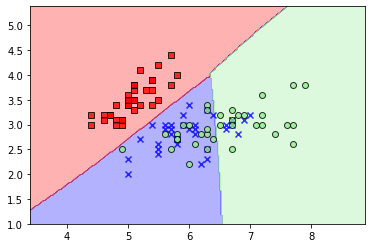

In [29]:
svm_visual.plot_decision_regions(Xtrain, ytrain, svc)

/home/hadoop/machinelearning/svm_visual.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolor='black')


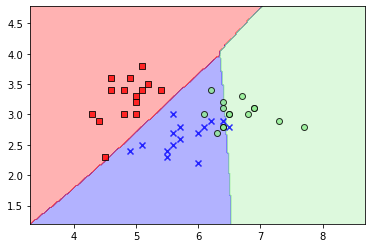

In [30]:
svm_visual.plot_decision_regions(Xtest, ytest, svc)

In [31]:
data = iris.data[:, 2:]

In [32]:
# 데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, stratify= target, test_size = 0.3, random_state=2111171155)

In [33]:
svc = SVC(kernel = 'rbf')
svc.fit(Xtrain, ytrain)
pred = svc.predict(Xtest)

# 정확도
svc.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(0.9428571428571428, 0.9333333333333333)

In [36]:
# fresh.csv  이용해서 달콤함과 아삭함에 따른
# 과일,채소,단백질 분류분석을 SVM으로 실시하세요
# ex) 당도가 6, 아삭함이 4인 개체는 무엇으로 분류?

In [38]:
fresh = pd.read_csv('fresh.csv', encoding='cp949')

In [43]:
data = fresh.iloc[:, [1,2]]
target = fresh.범주

In [44]:
target = target.map({'과일':0, '단백질':1, '채소':2})

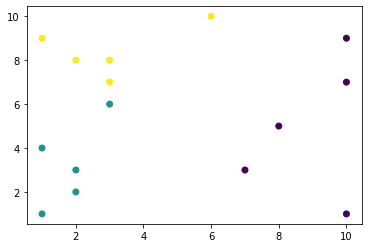

In [46]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=target)

In [57]:
svc = SVC(kernel='rbf', C=0.01, gamma=0.0001)
svc.fit(data, target)
svc.score(data, target)

0.9333333333333333

/home/hadoop/.local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/home/hadoop/machinelearning/svm_visual.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolor='black')


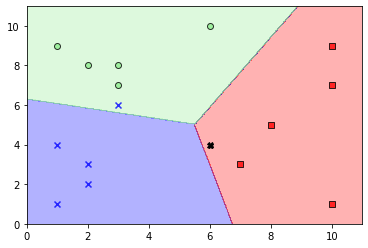

In [58]:
svm_visual.plot_decision_regions(np.array(data), np.array(target), svc)
plt.plot(6,4,'kX')

In [59]:
svc.predict([[6, 4]])



/home/hadoop/.local/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([0])